# "A typical Computer Vision problem: Part 1"
> "In this series of posts, I will tackle a typical computer vision problem. The data that we have belongs to a major outdoor and climbing gear retailer and mainly consists of climbing gear that consumers wear."

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [computer_vision, machine_learning, jupyter, ai]
- image: images/cv-1.jpg
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

# Introduction

In this series of posts, I will tackle a typical computer vision problem. The data that we have belongs to a major outdoor and climbing gear retailer and mainly consists of climbing gear that consumers wear. The goal of is to understand customer behavior.

# Motivation

I often get asked about the best approach to use when it comes to artificial intelligence problems including computer vision. One of the top questions is whether one should use classical machine learning or deep learning. Other questions follow such as if we are going to use deep learning, how complex and "deep" should the models be? While there is no clear theory or answer for that, I always suggest trying starting simple, evaluate the results, then if we're not satisfied about the results, go deeper. It highly depends on the business requirements and the accuracy that we want to achieve, i.e, we might be a bit tolerant if we're doing spam detection, but if we're trying to achieve cancer detection in medical reports, then it's another story!

This series consists of three parts:
1. Exploring the Data, Plotting and Resizing (This post).
2. Using Simple Statistical Machine Learning.
3. Achieving Higher Accuracy with Convolutional Neural Networks.

# Part 1: Exploring the Data, Plotting and Resizing

Throughout this series, I will be using Jupyter Notebooks and Google Colab to run the notebooks.

As with any machine learning problem, it's important to understand the data in order to build robust models. When dealing with computer vision problems, it's helpful to display the images, check their sizes and perform pre-processing.

## Importing the data 

Google Colab provides an awesome interface to directly upload files from Jupyter Notebooks. In case you want to run this locally, you can skip this step and have the zip file in the same directory.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2 as cv

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving gear_images.zip to gear_images.zip


In [ ]:
import zipfile
with zipfile.ZipFile('gear_images.zip', 'r') as zip_ref:
    zip_ref.extractall()
# List the content of directory to verify if the files have been extracted
os.listdir()

['.config', 'gear_images', 'gear_images.zip', 'sample_data']

## Statistics on the images and classes

It's vital to check how many classes we're dealing with and the number of samples in each of them. For this reason, I will go over the main directory, calculate the number of files in each of the sub-directories and print the numbers.

In [ ]:
directory = 'gear_images'
num_classes = 0
for i, subdir in enumerate(sorted(os.listdir(directory))):
    print("The class {} has {} images.".format(subdir, len([name for name in os.listdir(os.path.join(directory, subdir))])))
    num_classes += 1
print("There are {} classes".format(num_classes))

The class axes has 79 images.
The class boots has 116 images.
The class carabiners has 262 images.
The class crampons has 118 images.
The class gloves has 215 images.
The class hardshell_jackets has 459 images.
The class harnesses has 185 images.
The class helmets has 95 images.
The class insulated_jackets has 240 images.
The class pulleys has 42 images.
The class rope has 194 images.
The class tents has 117 images.
There are 12 classes


## Plotting the first image of each class

The data consists of 12 classes. I will create a figure and a set of  12 subplots to plot the first image of each class.

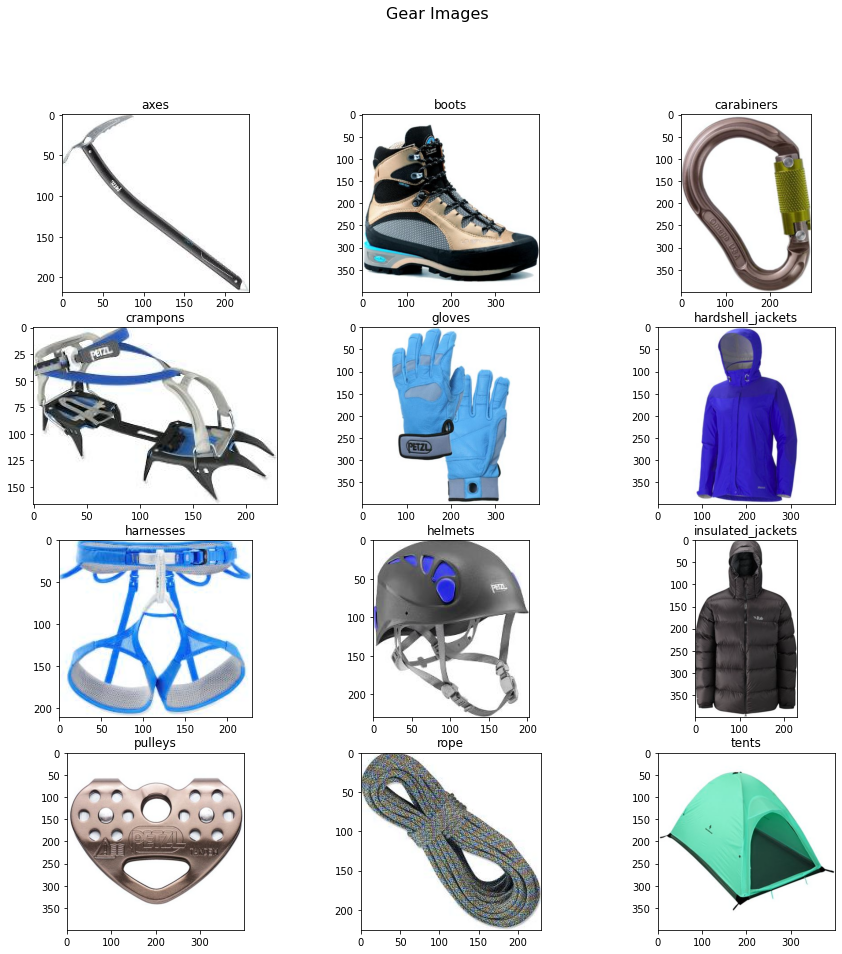

In [ ]:
directory = 'gear_images'
fig, axes = plt.subplots(4, 3, figsize=(15,15))
fig.suptitle('Gear Images', fontsize=16)
for i, subdir in enumerate(sorted(os.listdir(directory))):
    subfile = sorted(os.listdir(os.path.join(directory, subdir)))[0]
    path = os.path.join(directory, subdir)
    path = os.path.join(path, subfile)
    img = cv.imread(path)
    if i<3:
        axes[0, i].imshow(img)
        axes[0, i].set_title(subdir)
    elif (i>=3 and i<6):
        axes[1, i-3].imshow(img)
        axes[1, i-3].set_title(subdir)
    elif (i>=6 and i<9):
        axes[2, i-6].imshow(img)
        axes[2, i-6].set_title(subdir)
    elif (i>=9 and i<12):
        axes[3, i-9].imshow(img)
        axes[3, i-9].set_title(subdir)
        

## Resizing the images and adding white padding

It's clear that the images come with different sizes. Since all the models that I will be using require the images to be of same size, I need to resize all the images to (128, 128). Whenever needed, white padding will be added to maintain the aspect ratio.

**resize_to_128(*img*)** is a helper function that will provide the beforementioned functionality.

For the resizing, I will be using the OpenCV's **resize()** function and for the adding the white padding, I will be using the **copyMakeBorder()** function.

In [ ]:
def resize_to_128(img):
    old_size = img.shape[:2]
    if old_size[0] == old_size[1]:
        img = cv.resize(img,(128, 128))
    else:
        ratio = float(128)/max(old_size)
        new_size = tuple([int(x*ratio) for x in old_size])
        img = cv.resize(img, (new_size[1], new_size[0]))
        delta_w = 128 - new_size[1]
        delta_h = 128 - new_size[0]
        top, bottom = delta_h//2, delta_h-(delta_h//2)
        left, right = delta_w//2, delta_w-(delta_w//2)
        img = cv.copyMakeBorder(img, top, bottom, left, right, cv.BORDER_CONSTANT, value=[255, 255, 255])
    return img

## Testing the resizing function output

It's important to make sure that the output of the resizing function has a shape of (128, 128). For this reason, I will pick a random image and perform the resizing while printing the original and resized shapes.

In [ ]:
img = cv.imread('gear_images/axes/113410.jpeg')
print("The original image size is {}".format(img.shape[:2]))
img = resize_to_128(img)
print("The resized image size is {}".format(img.shape[:2]))

The original image size is (230, 102)
The resized image size is (128, 128)


## Ploting the first image of each directory along with its resized version

In this part, I will display the first image in each folder along with its resized counterpart. I used the **tight_layout()** function to add some padding and prevent the subplots from overlapping.

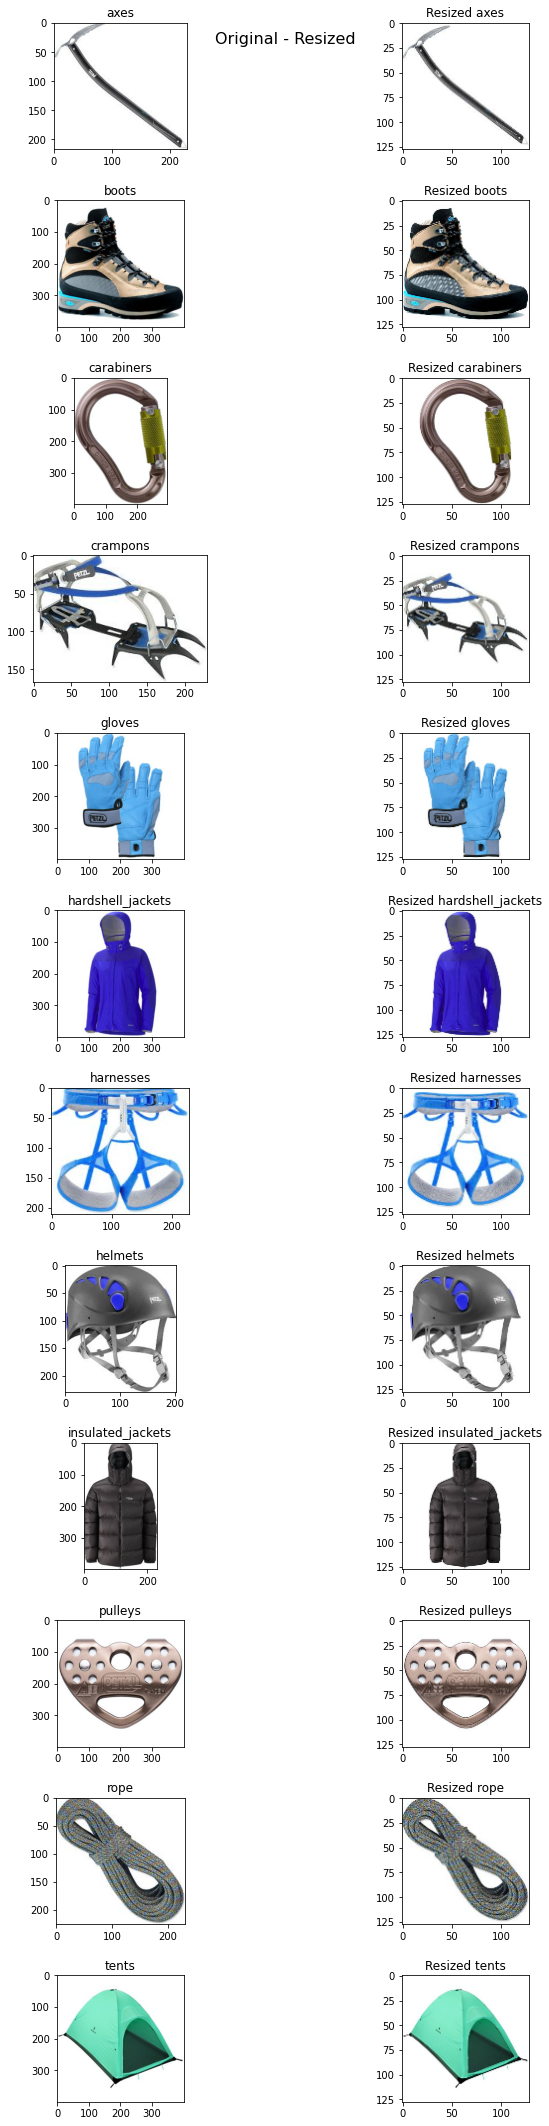

In [ ]:
directory = 'gear_images'
fig, axes = plt.subplots(12, 2, figsize=(10,30))
fig.suptitle('Original - Resized', fontsize=16)
fig.tight_layout(pad=3.0)
for i, subdir in enumerate(sorted(os.listdir(directory))):
    subfile = sorted(os.listdir(os.path.join(directory, subdir)))[0]
    path = os.path.join(directory, subdir)
    path = os.path.join(path, subfile)
    img = cv.imread(path)
    resized_img = resize_to_128(img)
    axes[i, 0].imshow(img)
    axes[i, 0].set_title(subdir)
    axes[i, 1].imshow(resized_img)
    axes[i, 1].set_title('Resized '+subdir)

# Conclusion and Next Steps

In this part, I explored the data that we're dealing with and performed some statistics on the number of images. I created and tested a helper function that will resize a given image to (128, 128). Finally I plotted the resized images along with their originals.

In the next part, I will be using machine learning to perform classification for the 12 classes we have.